In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.datasets import load_iris

In [15]:
data= load_iris()

In [16]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

In [19]:
X=X.drop(columns='sepal width (cm)')

<AxesSubplot:>

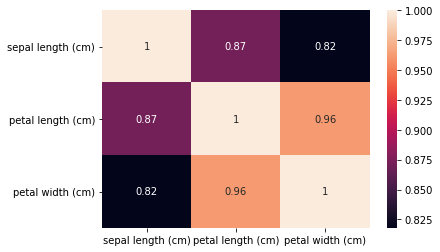

In [22]:
sns.heatmap(X.corr(),annot=True)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.25)

In [46]:
%%time
model = DecisionTreeClassifier(max_depth=1)
model.fit(x_train,y_train)

Wall time: 5.75 ms


DecisionTreeClassifier(max_depth=1)

In [44]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.6607142857142857, 0.6842105263157895)

In [49]:
ypred = model.predict(x_test)
pd.DataFrame({'real':y_test,'pred':ypred}).value_counts()

real  pred
0     0       18
2     1       12
1     1        8
dtype: int64

<h3>scratch implementation</h3>

In [54]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [57]:

class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTreeClassifier1:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [59]:
    dataset = load_iris()
    X, y = dataset.data, dataset.target  # pylint: disable=no-member
    clf = DecisionTreeClassifier1(max_depth=1)
    clf.fit(X, y)
    print(clf.predict([[0, 0, 5, 1.5]]))

[1]
